In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('price_department_in_hanoi.csv')
data.head()


,Dự án/ khu,Số,Ngõ,Đường/Phố,Xã/ Phường/ Thị trấn,Quận/Huyện,Diện tích(m2),Giá (tỷ đồng),Hướng nhà,Hướng ban công,Số phòng ngủ,Số toilet
0,Le Grand Jardin Sài Đồng,NaN,NaN,Huỳnh Văn Nghệ,Sài Đồng,Long Biên,65.0,2.50,NaN,NaN,2.0,NaN
1,Golden Palace,NaN,NaN,Mễ Trì,Mễ Trì,Nam Từ Liêm,118.0,3.30,Bắc,Nam,3.0,2.0
2,NaN,NaN,NaN,NaN,Nguyễn Du,Hai Bà Trưng,30.0,1.20,NaN,NaN,NaN,NaN
3,Tecco Garden,NaN,NaN,Tứ Hiệp,Tứ Hiệp,Thanh Trì,127.0,3.18,NaN,NaN,3.0,2.0
4,Moonlight 1 - An Lạc Green Symphony,NaN,NaN,NaN,An Khánh,Hoài Đức,81.0,3.30,NaN,Đông - Nam,3.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dự án/ khu            4547 non-null   object 
 1   Số                    723 non-null    object 
 2   Ngõ                   12 non-null     object 
 3   Đường/Phố             3898 non-null   object 
 4   Xã/ Phường/ Thị trấn  4752 non-null   object 
 5   Quận/Huyện            4884 non-null   object 
 6   Diện tích(m2)         4884 non-null   float64
 7   Giá (tỷ đồng)         4884 non-null   float64
 8   Hướng nhà             2368 non-null   object 
 9   Hướng ban công        2550 non-null   object 
 10  Số phòng ngủ          4508 non-null   float64
 11  Số toilet             3736 non-null   float64
dtypes: float64(4), object(8)
memory usage: 458.0+ KB


In [4]:
data.nunique()

Dự án/ khu              511
Số                      134
Ngõ                      11
Đường/Phố               294
Xã/ Phường/ Thị trấn    167
Quận/Huyện               20
Diện tích(m2)           584
Giá (tỷ đồng)           698
Hướng nhà                 8
Hướng ban công            8
Số phòng ngủ              7
Số toilet                 6
dtype: int64

In [5]:
data.describe()

,Diện tích(m2),Giá (tỷ đồng),Số phòng ngủ,Số toilet
count,4884.000000,4884.000000,4508.000000,3736.000000
mean,90.325147,3.972659,2.454525,1.933084
std,49.733506,4.725739,0.758895,0.510996
min,22.000000,0.500000,1.000000,1.000000
25%,66.390000,2.250000,2.000000,2.000000
50%,81.000000,3.280000,2.000000,2.000000
75%,106.000000,4.590000,3.000000,2.000000
max,2000.000000,175.000000,22.000000,6.000000


In [6]:
data.isnull().sum()

Dự án/ khu               337
Số                      4161
Ngõ                     4872
Đường/Phố                986
Xã/ Phường/ Thị trấn     132
Quận/Huyện                 0
Diện tích(m2)              0
Giá (tỷ đồng)              0
Hướng nhà               2516
Hướng ban công          2334
Số phòng ngủ             376
Số toilet               1148
dtype: int64

In [7]:
null = data.isnull().sum() / data.shape[0] * 100
col_to_drop = null[null > 40].keys()
col_to_drop

Index(['Số', 'Ngõ', 'Hướng nhà', 'Hướng ban công'], dtype='object')

In [8]:
data.drop(columns=col_to_drop,inplace=True)

In [9]:
len(data.columns[data.isnull().any()])

5

In [10]:
data['Số phòng ngủ'] = data['Số phòng ngủ'].fillna(data['Số phòng ngủ'].mean())
data['Số toilet'] = data['Số toilet'].fillna(data['Số toilet'].mean())
data['Dự án/ khu'] = data['Dự án/ khu'].fillna('Không có')
data['Đường/Phố'] = data['Đường/Phố'].fillna('Không có')
data['Xã/ Phường/ Thị trấn'] = data['Xã/ Phường/ Thị trấn'].fillna('Không có')
data


,Dự án/ khu,Đường/Phố,Xã/ Phường/ Thị trấn,Quận/Huyện,Diện tích(m2),Giá (tỷ đồng),Số phòng ngủ,Số toilet
0,Le Grand Jardin Sài Đồng,Huỳnh Văn Nghệ,Sài Đồng,Long Biên,65.0,2.50,2.000000,1.933084
1,Golden Palace,Mễ Trì,Mễ Trì,Nam Từ Liêm,118.0,3.30,3.000000,2.000000
2,Không có,Không có,Nguyễn Du,Hai Bà Trưng,30.0,1.20,2.454525,1.933084
3,Tecco Garden,Tứ Hiệp,Tứ Hiệp,Thanh Trì,127.0,3.18,3.000000,2.000000
4,Moonlight 1 - An Lạc Green Symphony,Không có,An Khánh,Hoài Đức,81.0,3.30,3.000000,1.933084
...,...,...,...,...,...,...,...,...
4879,Thống Nhất Complex,Nguyễn Tuân,Thanh Xuân Trung,Thanh Xuân,95.0,4.10,3.000000,2.000000
4880,Ciputra Hà Nội,Lạc Long Quân,Phú Thượng,Tây Hồ,114.0,5.10,3.000000,1.933084
4881,Thống Nhất Complex,Nguyễn Tuân,Thanh Xuân Trung,Thanh Xuân,122.0,6.10,3.000000,1.933084
4882,Nhà ở cho CBCS Bộ Công an,Phạm Văn Đồng,Cổ Nhuế 2,Bắc Từ Liêm,134.0,4.90,3.000000,2.000000


In [11]:
len(data.columns[data.isnull().any()])

0

In [12]:
def outliers(data_temp, k=3):
    q1, q3 = np.percentile(data_temp, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    outliers = [index for index,x in enumerate(data_temp) if x < lower_bound or x > upper_bound]
    
    return outliers

In [13]:
cont_features = np.array([i for i in data.columns.tolist() if data[i].dtype != 'object'])
raws = []
raws += outliers(data['Giá (tỷ đồng)'])
len(set(raws))

101

In [14]:
# list(set(raws))
data.drop(list(set(raws)), axis=0, inplace=True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_12228\3164084749.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(data['Giá (tỷ đồng)'])


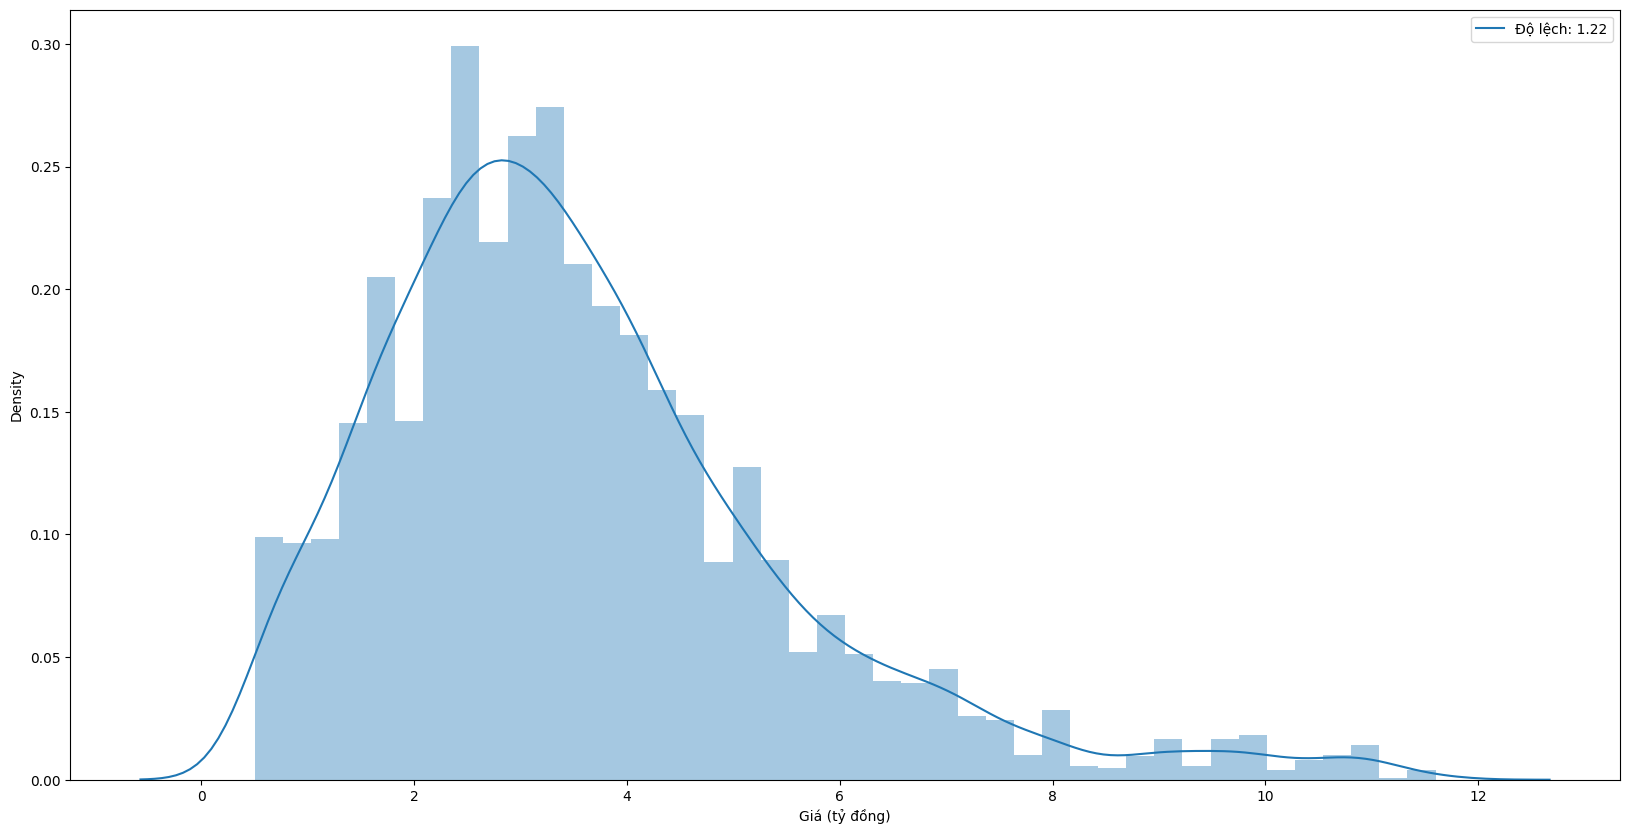

In [15]:
import seaborn as sns
plt.figure(figsize=(20, 10))
bar = sns.distplot(data['Giá (tỷ đồng)'])
bar.legend(['Độ lệch: {:.2f}'.format(data['Giá (tỷ đồng)'].skew())])
plt.show()

In [16]:
X = data.drop('Giá (tỷ đồng)',axis=1)
y = data['Giá (tỷ đồng)']

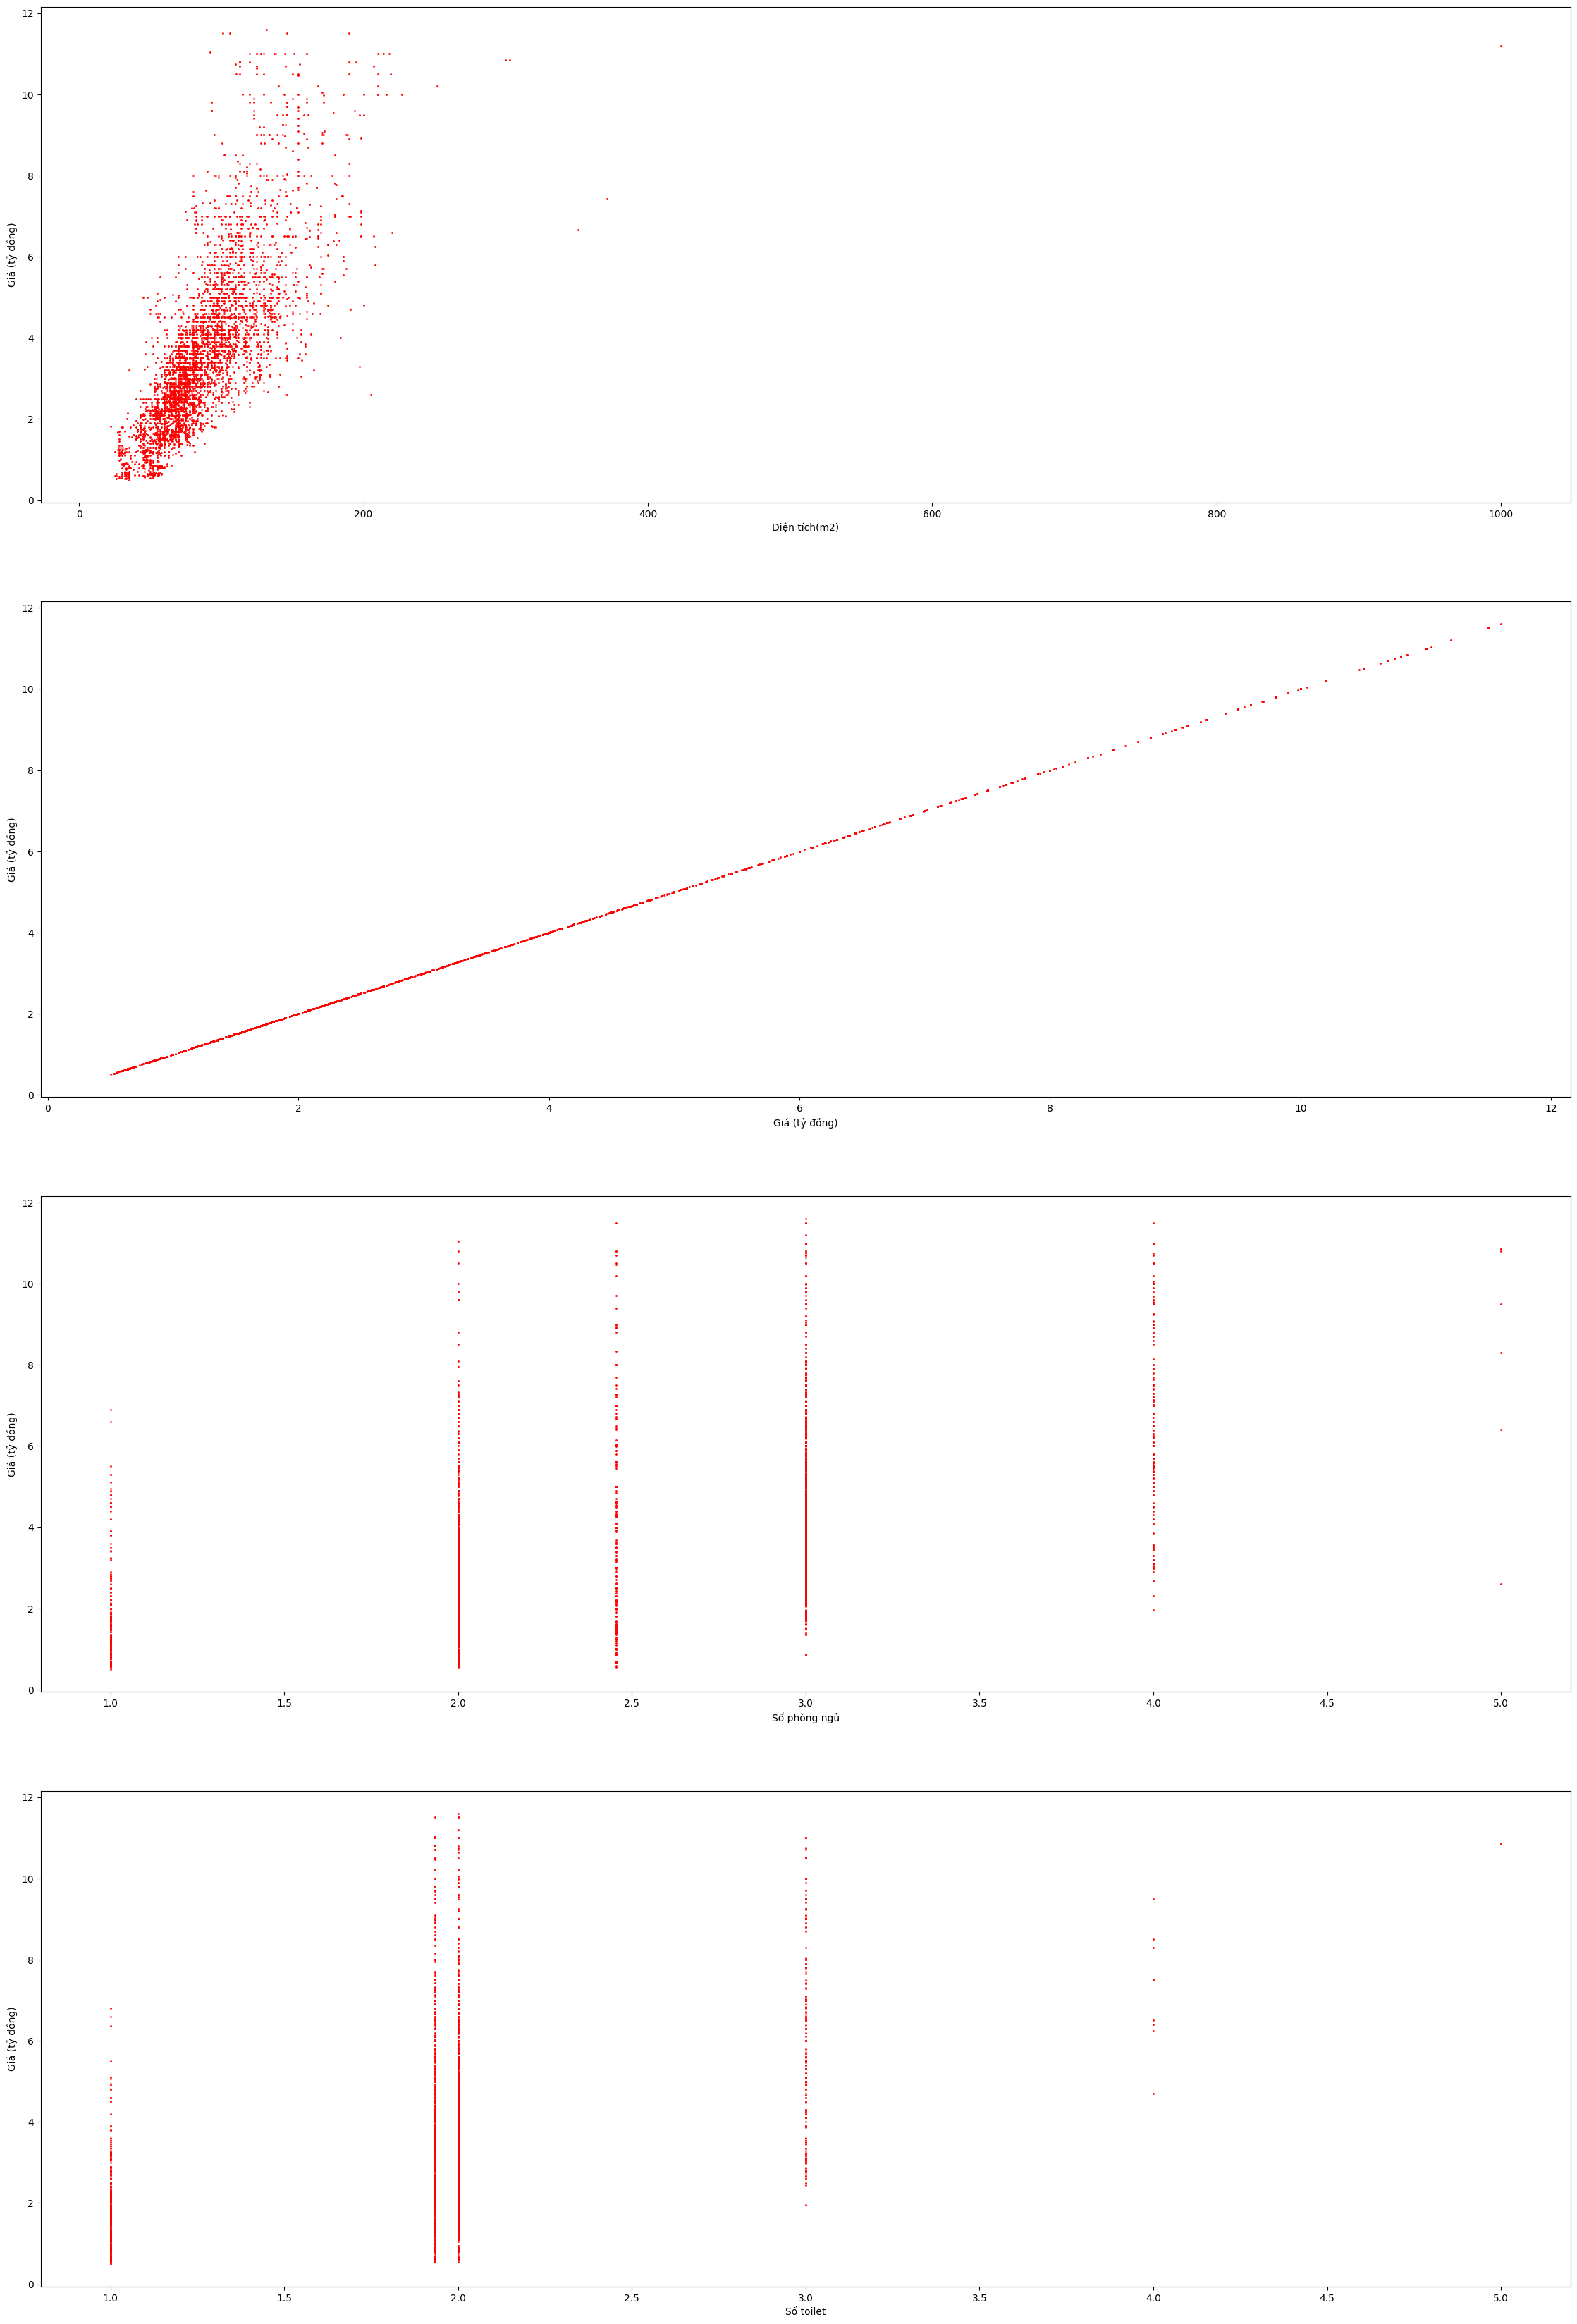

In [17]:
f,ax = plt.subplots(4,1, figsize=(28,42))
k=0
for j in range(4):
    if k<4:
        ax[j].scatter(x=cont_features[k], y='Giá (tỷ đồng)', data=data, s=1, c='red')
        ax[j].set_xlabel(cont_features[k])
        ax[j].set_ylabel('Giá (tỷ đồng)')
        k=k+1
plt.show()

In [18]:
cat_features = np.array([i for i in data.columns.tolist() if data[i].dtype == 'object'])
cont_features = np.array([i for i in data.columns.tolist() if data[i].dtype != 'object'])

In [19]:
duan = data['Dự án/ khu'].unique()
quanhuyen = data['Quận/Huyện'].unique()
xaphuong = data['Xã/ Phường/ Thị trấn'].unique()
duongpho = data['Đường/Phố'].unique()

In [20]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])

<Axes: >

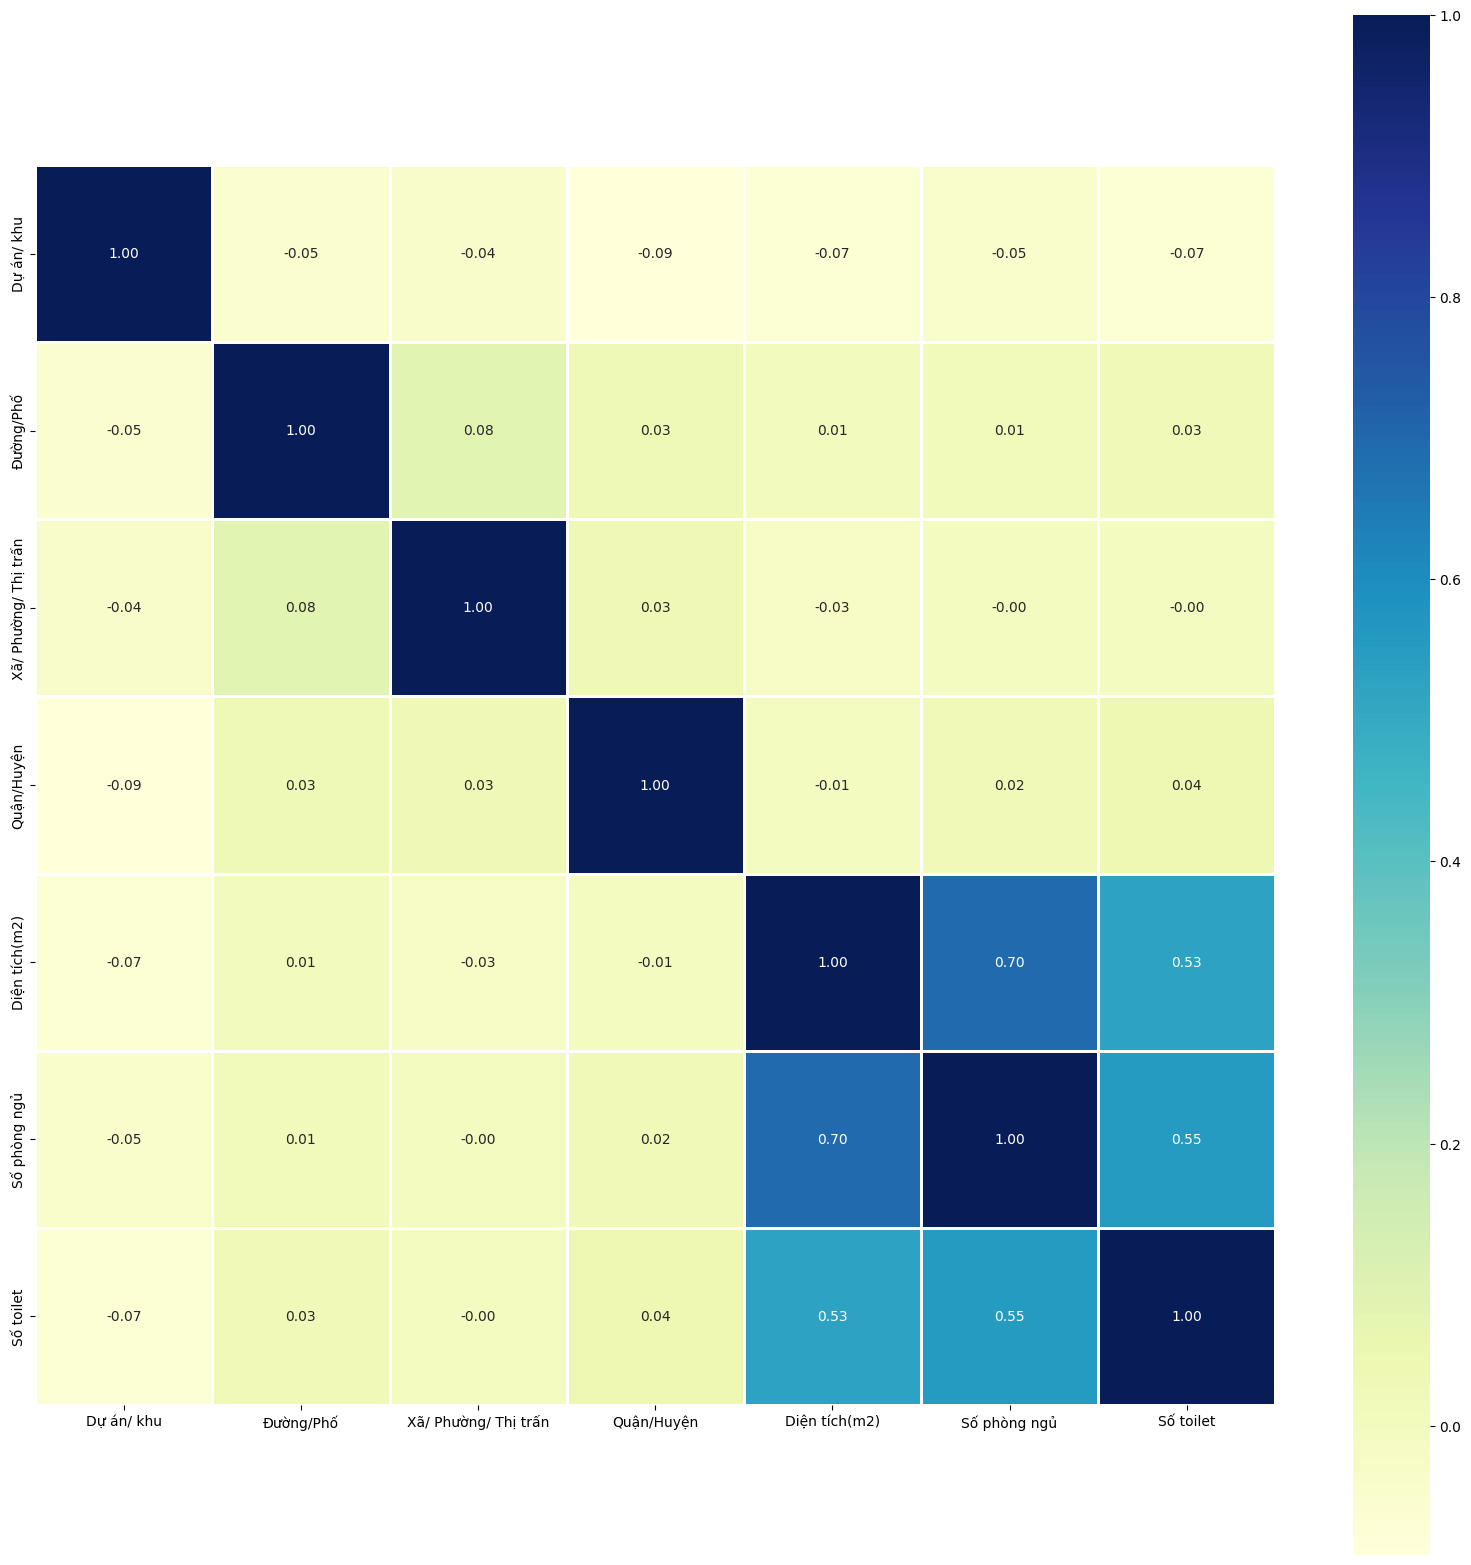

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu',annot=True, cbar=True, fmt='.2f', square=True, linewidths=2)

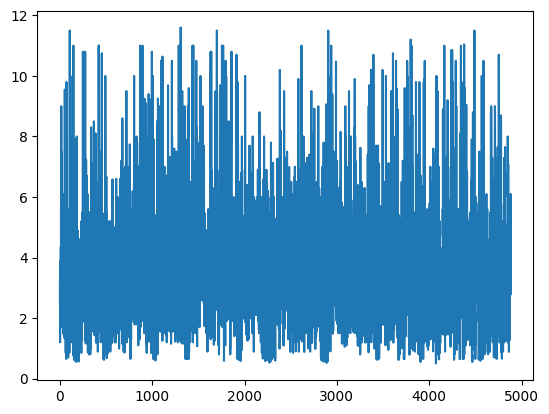

In [22]:
plt.plot(data['Giá (tỷ đồng)'])

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# xtrain = scaler.fit_transform(xtrain)
# xtest = scaler.transform(xtest)


In [25]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=7)

# xtrain = pca.fit_transform(xtrain)
# xtest = pca.transform(xtest)

In [26]:
print(f'X_train',xtrain.shape)  
print(f'y_train',ytrain.shape) 
print(f'X_test',xtest.shape)
print(f'y_test',ytest.shape)

X_train (3826, 7)
y_train (3826,)
X_test (957, 7)
y_test (957,)


<Axes: >

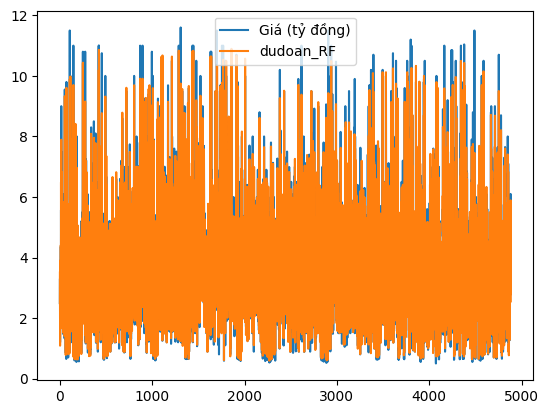

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
filename1 = 'model_Random_Forest.sav'
pickle.dump(rf, open(filename1, 'wb'))
data['dudoan_RF']=rf.predict(X)
data[['Giá (tỷ đồng)','dudoan_RF']].plot()

In [28]:
c=np.sqrt(pow(data['dudoan_RF']-data['Giá (tỷ đồng)'],2).mean())
d = pow(data['dudoan_RF']-data['Giá (tỷ đồng)'],2).mean()
print(c)
print(d)

0.37456582271900185
0.14029955554916274


In [29]:
# duan
# duongpho
# xaphuong
quanhuyen

array(['Long Biên', 'Nam Từ Liêm', 'Hai Bà Trưng', 'Thanh Trì',
       'Hoài Đức', 'Bắc Từ Liêm', 'Gia Lâm', 'Hà Đông', 'Cầu Giấy',
       'Hoàng Mai', 'Ba Đình', 'Tây Hồ', 'Thanh Xuân', 'Đống Đa',
       'Đông Anh', 'Tân Triều', 'Đan Phượng', 'Thạch Thất', 'Hoàn Kiếm',
       'Mê Linh'], dtype=object)

In [30]:
# X['Dự án/ khu'].unique()
# X['Đường/Phố'].unique()
# X['Xã/ Phường/ Thị trấn'].unique()
X['Quận/Huyện'].unique()

array([ 9, 11,  4, 12,  5,  1,  3,  8,  2,  7,  0, 16, 13, 19, 18, 15, 17,
       14,  6, 10])

In [31]:
data['Mã quận huyện'] = X['Quận/Huyện']
data['Mã xã phường'] = X['Xã/ Phường/ Thị trấn']
data['Mã đường phố'] = X['Đường/Phố']
data['Mã dự án'] = X['Dự án/ khu']


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4783 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dự án/ khu            4783 non-null   int32  
 1   Đường/Phố             4783 non-null   int32  
 2   Xã/ Phường/ Thị trấn  4783 non-null   int32  
 3   Quận/Huyện            4783 non-null   int32  
 4   Diện tích(m2)         4783 non-null   float64
 5   Số phòng ngủ          4783 non-null   float64
 6   Số toilet             4783 non-null   float64
dtypes: float64(3), int32(4)
memory usage: 224.2 KB


In [33]:
for col in data:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Dự án/ khu
Dự án/ khu
Không có                             335
Vinhomes Ocean Park Gia Lâm          123
GoldSeason                            60
Goldmark City                         51
Kim Văn Kim Lũ                        46
                                    ... 
Ngõ 815                                1
Khu đô thị Trung Hòa - Nhân Chính      1
65                                     1
K2                                     1
Sakura Tower                           1
Name: count, Length: 508, dtype: int64

Frequency of Categories for varible Đường/Phố
Đường/Phố
Không có       981
Tố Hữu         219
Minh Khai      171
Phạm Hùng      136
Nguyễn Tuân    114
              ... 
Đông Tác         1
Thượng Đình      1
Lê Trực          1
Đặng Dung        1
Mai Động         1
Name: count, Length: 292, dtype: int64

Frequency of Categories for varible Xã/ Phường/ Thị trấn
Xã/ Phường/ Thị trấn
Tây Mỗ              238
Thanh Xuân Trung    210
Mỹ Đình 2          

In [34]:
X.head()


,Dự án/ khu,Đường/Phố,Xã/ Phường/ Thị trấn,Quận/Huyện,Diện tích(m2),Số phòng ngủ,Số toilet
0,245,52,95,9,65.0,2.000000,1.933084
1,140,115,56,11,118.0,3.000000,2.000000
2,221,72,66,4,30.0,2.454525,1.933084
3,391,236,129,12,127.0,3.000000,2.000000
4,269,72,0,5,81.0,3.000000,1.933084
